<a href="https://colab.research.google.com/github/iqbalamo93/Autoencoder/blob/master/DenoiseImages_Kr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2498 - accuracy: 0.0893 - val_loss: 0.2160 - val_accuracy: 0.1201
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1978 - accuracy: 0.1475 - val_loss: 0.1768 - val_accuracy: 0.1685
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1649 - accuracy: 0.1894 - val_loss: 0.1552 - val_accuracy: 0.2074
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1497 - accuracy: 0.2094 - val_loss: 0.1473 - val_accuracy: 0.2146
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1429 - accuracy: 0.2201 - val_loss: 0.1391 - val_accuracy: 0.2199


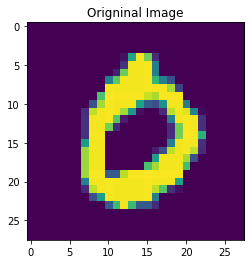

Text(0.5, 1.0, 'Reproduced Image')

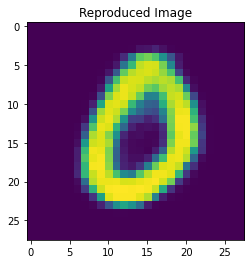

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test,y_test) = mnist.load_data()

plt.imshow(X_train[4])

X_train = X_train/255
X_test  = X_test/255

from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

from tensorflow.keras.optimizers import SGD

X_train[1].shape

X_train.shape

y_train[4]

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

decoder  = Sequential()
decoder.add(Dense(50,input_shape=[25], activation = 'relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))
decoder.add(Dense(784, activation = 'sigmoid'))
decoder.add(Reshape([28,28]))

autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss='binary_crossentropy',
                  optimizer=SGD(1.5),
                  metrics=['accuracy'])

autoencoder.fit(X_train, X_train,epochs=5,validation_data=(X_test, X_test))

passed_images = autoencoder.predict(X_test[:10])

n = 3
plt.imshow(X_test[n])
plt.title('Origninal Image')
plt.show()
plt.imshow(passed_images[n])
plt.title('Reproduced Image')

In [2]:
from tensorflow.keras.layers import GaussianNoise

In [3]:
sample = GaussianNoise(0.2)

In [6]:
noisey  =  sample(X_test[:10],training=True)

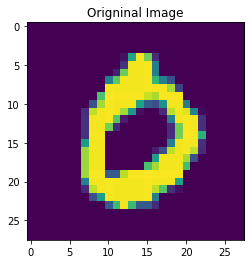

Text(0.5, 1.0, 'Noisey Image')

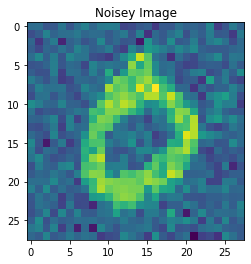

In [7]:
n = 3
plt.imshow(X_test[n])
plt.title('Origninal Image')
plt.show()
plt.imshow(noisey[n])
plt.title('Noisey Image')

In [12]:
import tensorflow as tf

In [13]:
#Noise removal autoencoder
tf.random.set_seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [14]:

decoder  = Sequential()
decoder.add(Dense(50,input_shape=[25], activation = 'relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))
decoder.add(Dense(784, activation = 'sigmoid'))
decoder.add(Reshape([28,28]))

In [15]:
noise_remover = Sequential([encoder,decoder])


In [16]:
noise_remover.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [17]:
noise_remover.fit(X_train,X_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1664 - accuracy: 0.1840
Epoch 2/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1262 - accuracy: 0.2344
Epoch 3/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1182 - accuracy: 0.2495
Epoch 4/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1145 - accuracy: 0.2561
Epoch 5/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1115 - accuracy: 0.2617
Epoch 6/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1091 - accuracy: 0.2652
Epoch 7/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1072 - accuracy: 0.2679
Epoch 8/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1055 - accuracy: 0.2714


In [18]:
ten_noisey_images = sample(X_test[:10],training=True)

In [19]:
de_noised_images = noise_remover(ten_noisey_images)

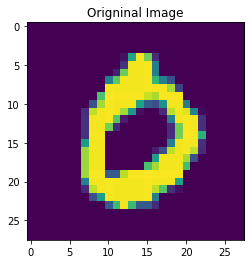

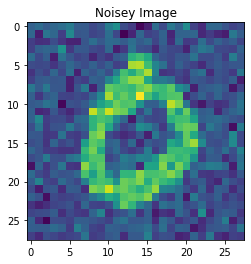

Text(0.5, 1.0, 'removed_Noisey Image')

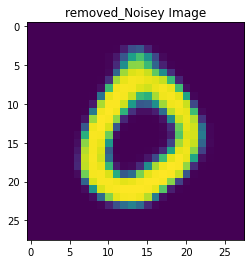

In [21]:
n = 3
plt.imshow(X_test[n])
plt.title('Origninal Image')
plt.show()
plt.imshow(ten_noisey_images[n])
plt.title('Noisey Image')
plt.show()
plt.imshow(de_noised_images[n])
plt.title('removed_Noisey Image')